<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://raw.githubusercontent.com/Unidata/MetPy/master/src/metpy/plots/_static/unidata_150x150.png" alt="Unidata Logo" style="height: 98px;">
</div>

<h1>Remote Data Access</h1>
    <h3>MetPy for Quantitative Analysis of Meteorological Data</h3>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

### Topics
1. <a href="#siphon">Remote Data Access I: Working with Siphon</a>
1. <a href="#xarray">Working with xarray</a>
1. <a href="#ncss">Remote Data Access II: NetCDF Subset Service (NCSS)</a>
1. <a href="#cartopy">Coordinate Reference Systems</a>
1. <a href="#calc">Preview: Calculations</a>

<a name="background"></a>
## Background

Atmospheric data are collected by numerous institutions in a variety of data formats and stored in disparate places. Accessing and distributing these datasets are complicated activities, but are made simpler with the use of the THREDDS Data Server (TDS). In this lesson, you will learn more about data access with the TDS and how to use data in Python.

<a name="siphon"></a>
## Remote Data Access I: Working with Siphon

<video width="600" src="https://elearning.unidata.ucar.edu/metpy/QuantitativeAnalysisILT/SiphonTDS/IntroSiphonTDS.mp4"  
       controls>
</video>

<a href="https://elearning.unidata.ucar.edu/metpy/QuantitativeAnalysisILT/SiphonTDS/IntroSiphonTDS.mp4" target="blank">Video source</a>

### The TDSCatalog

Let's now practice the demo we saw in the video by requesting the same data from Unidata's THREDDS Data Server, <a href="https://thredds.ucar.edu" target="blank">https://thredds.ucar.edu</a>. 

In [1]:
url = 'https://thredds.ucar.edu/thredds/catalog/satellite/goes/east/products/CloudAndMoistureImagery/CONUS/Channel02/current/catalog.html'

Using string parsing, we can automate replacing the .html extension with a .xml extension

In [2]:
# Change the URL above to be an xml document using Python's built-in replace module
url_xml = url.replace(".html", ".xml")
print(url_xml)

https://thredds.ucar.edu/thredds/catalog/satellite/goes/east/products/CloudAndMoistureImagery/CONUS/Channel02/current/catalog.xml


Now that we have the catalog xml document, it's time to create the TDSCatalog object.

In [3]:
# import the TDSCatalog class from Siphon for obtaining our data 
from siphon.catalog import TDSCatalog

# Create the TDS Catalog object, satcat
cat = TDSCatalog(url_xml)

This gives us a <a href="https://thredds.ucar.edu/thredds/catalog/satellite/goes/east/products/CloudAndMoistureImagery/CONUS/Channel02/current/catalog.html" target="blank">catalog of the netCDF files available</a>. The names of each file are stored in the `datasets` property. For this example we'll just look at the first item. 

In [4]:
cat.datasets[0]

OR_ABI-L2-CMIPC-M6C02_G16_s20232192011170_e20232192011170_c20232192011170.nc

Now we use the `remote_access()` method to start requesting the data from the latest collection using the default CdmRemote service and returning data in xarray format. 

In [5]:
ds = cat.datasets[0].remote_access(use_xarray=True)
ds

<xarray.Dataset>
Dimensions:               (y: 6000, x: 10000)
Coordinates:
    time                  datetime64[ns] ...
  * y                     (y) float32 1.282e+05 1.282e+05 ... 4.425e+04
  * x                     (x) float32 -1.014e+05 -1.013e+05 ... 3.863e+04
Data variables:
    Sectorized_CMI        (y, x) float32 ...
    fixedgrid_projection  int32 ...
Attributes: (12/31)
    _NCProperties:               version=1|netcdflibversion=4.6.1|hdf5libvers...
    title:                       Sectorized Cloud and Moisture Imagery for th...
    ICD_version:                 GROUND SEGMENT (GS) TO ADVANCED WEATHER INTE...
    Conventions:                 CF-1.6
    channel_id:                  2
    central_wavelength:          0.64
    ...                          ...
    pixel_y_size:                0.5
    satellite_latitude:          0.0
    satellite_longitude:         -75.0
    satellite_altitude:          35786023.0
    created_by:                  ldm-alchemy
    product_tiles_received:      15

<div class="alert alert-success">
    <b>DISCUSSION</b>: 

The CdmRemote service creates a netCDF-like object on the TDS that a client can make incremental requests to. 

1. How does this setup benefit you, the user?
2. When does it not make sense to use the CdmRemote service?

</div>


<a name="xarray"></a>
## Working with xarray

### xarray primer

Now we have an xarray **Dataset** that we can work with. This is a framework used for organizing multidimensional datasets, such as NetCDF and GRIB. 

![xarray diagram](https://github.com/pydata/xarray/raw/main/doc/_static/dataset-diagram.png "xarray model diagram")

xarray has an HTML-formatted interactive summary tool for examing datasets, as we just saw above. Simply execute the variable name to create the summary. This is a tool we will use often to examine our data throughout this session.  

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">More Info</p>
    <i>Multidimensional datasets:</i> <br>For further information about multidimensional data structures, check out the microlearnign module on Unidata eLearning: <a href="https://elearning.unidata.ucar.edu/mod/scorm/view.php?id=32" target ="blank">Multidimensional Data Structures</a>
<br><br>
<i>CF Conventions:</i> <br>You may see the CF (Climate and Forecasting) metadata conventions in many popular atmospheric datasets. These conventions provide standardized variable names and units and recommendations on metadata such as projection information and coordinate information. You can read more about CF conventions here: <a href="cfconventions.org" target="blank">https://cfconventions.org/</a>
</div>

In [6]:
# Preview xarray DataSet in an HTML-formatted preview
ds

<xarray.Dataset>
Dimensions:               (y: 6000, x: 10000)
Coordinates:
    time                  datetime64[ns] 2023-08-07T20:11:17
  * y                     (y) float32 1.282e+05 1.282e+05 ... 4.425e+04
  * x                     (x) float32 -1.014e+05 -1.013e+05 ... 3.863e+04
Data variables:
    Sectorized_CMI        (y, x) float32 ...
    fixedgrid_projection  >i4 -2147483647
Attributes: (12/31)
    _NCProperties:               version=1|netcdflibversion=4.6.1|hdf5libvers...
    title:                       Sectorized Cloud and Moisture Imagery for th...
    ICD_version:                 GROUND SEGMENT (GS) TO ADVANCED WEATHER INTE...
    Conventions:                 CF-1.6
    channel_id:                  2
    central_wavelength:          0.64
    ...                          ...
    pixel_y_size:                0.5
    satellite_latitude:          0.0
    satellite_longitude:         -75.0
    satellite_altitude:          35786023.0
    created_by:                  ldm-alchemy
    product_tiles_received:      15

In the preview, we see an interactive summary of the dimensions, coordinates, variables, attributes for the DataSet. Each variable is stored as an xarray [DataArray](https://docs.xarray.dev/en/stable/user-guide/data-structures.html#dataarray). DataArrays carry metadata such as units and projection as well as a numpy-like array of values that MetPy can leverage for calculations and plotting. 

In [7]:
ds['Sectorized_CMI']

<xarray.DataArray 'Sectorized_CMI' (y: 6000, x: 10000)>
[60000000 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2023-08-07T20:11:17
  * y        (y) float32 1.282e+05 1.282e+05 1.282e+05 ... 4.426e+04 4.425e+04
  * x        (x) float32 -1.014e+05 -1.013e+05 ... 3.862e+04 3.863e+04
Attributes:
    standard_name:                                          toa_bidirectional...
    units:                                                  1
    grid_mapping:                                           fixedgrid_projection
    valid_min:                                              0
    valid_max:                                              4095
    percent_good_pixel_qf:                                  0.99999636
    percent_conditionally_usable_pixel_qf:                  0.0
    percent_out_of_range_pixel_qf:                          3.6150154e-06
    percent_no_value_pixel_qf:                              0.0
    percent_focal_plane_temperature_threshold_exceeded_qf:  0.0
    maximum_focal_plane_temperature:                        -999.0
    _ChunkSizes:                                            [2048 2048]

Variables can be referenced using list notation, as above, or dot notation, as below. Recall that you can use the tab key after the dot to look up available options. 

In [8]:
cmi = ds.Sectorized_CMI
cmi

<xarray.DataArray 'Sectorized_CMI' (y: 6000, x: 10000)>
[60000000 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2023-08-07T20:11:17
  * y        (y) float32 1.282e+05 1.282e+05 1.282e+05 ... 4.426e+04 4.425e+04
  * x        (x) float32 -1.014e+05 -1.013e+05 ... 3.862e+04 3.863e+04
Attributes:
    standard_name:                                          toa_bidirectional...
    units:                                                  1
    grid_mapping:                                           fixedgrid_projection
    valid_min:                                              0
    valid_max:                                              4095
    percent_good_pixel_qf:                                  0.99999636
    percent_conditionally_usable_pixel_qf:                  0.0
    percent_out_of_range_pixel_qf:                          3.6150154e-06
    percent_no_value_pixel_qf:                              0.0
    percent_focal_plane_temperature_threshold_exceeded_qf:  0.0
    maximum_focal_plane_temperature:                        -999.0
    _ChunkSizes:                                            [2048 2048]

This `cmi` DataArray can then be used for plotting, aggregating with other data, quantitative anlayses, among many other tasks. 

The satellite data we requested contains only one 2D image at a specific time. However, other multidimensional datasets may include many variables, times, vertical coordinates, and other information. Slicing multidimensional data into 2D DataArrays is a common practice for plotting and analyses, so let's request a different dataset and further explore helpful xarray tools. 

### xarray selection tools

Let's start by first requesting a new reanalysis dataset that contains a lot more times and variables, such as the HRRR.

<div class="alert alert-success">
    <b>EXERCISE</b>: Request HRRR data from a THREDDS Data Server
    
Open this TDS link in a new tab in your browser: 
    
Locate the following catalog from Unidata's THREDDS Data Server (<a href="https://thredds.ucar.edu" target="blank">https://thredds.ucar.edu</a>):
    
 <ul>
     <li>Source: High Resolution Rapid Refresh (HRRR) Forecast Model</li> 
     <li>Type: Analysis</li>
     <li>Resolution: 2.5 km </li>
     <li>Collection: latest</li>
</ul>
    
<ol>
    <li>Open the latest available dataset as a variable called <b>hrrr_ds</b></li>
    <li>Create a variable called <b>temp</b> that contains the <i>Temperature_isobaric</i> variable as a DataArray</li> 
</div>

In [9]:
## SOLUTION
# catalog URL
url = 'https://thredds.ucar.edu/thredds/catalog/grib/NCEP/HRRR/CONUS_2p5km_ANA/latest.html'

# Replace the file extension from html to xml
url_xml = url.replace(".html", ".xml")

# Create the catalog object for the HRRR dataset
cat = TDSCatalog(url_xml)

# Examine the available datasets prior to requesting data
cat.datasets

['HRRR_CONUS_2p5km_ana_20230808_1900.grib2']

In [10]:
## SOLUTION
# Request the latest collection
hrrr_ds = cat.datasets[0].remote_access(use_xarray=True)
hrrr_ds

<xarray.Dataset>
Dimensions:                                                                                                     (time1: 92, : 2, pressure_difference_layer: 1, pressure_difference_layer1: 1, height_above_ground_layer: 1, height_above_ground_layer1: 1, height_above_ground_layer2: 2, sigma_layer: 1, pressure_difference_layer2: 1, height_above_ground_layer3: 2, isobaric_layer: 1, pressure_difference_layer3: 2, time: 92, y: 1377, x: 2145, isobaric1: 5, height_above_ground: 1, height_above_ground1: 1, isobaric: 4, height_above_ground3: 1, height_above_ground2: 2)
Coordinates: (12/22)
  * x                                                                                                           (x) float32 ...
  * y                                                                                                           (y) float32 ...
  * time                                                                                                        (time) datetime64[ns] ...
    reftime                                                                                                     (time) datetime64[ns] ...
  * time1                                                                                                       (time1) datetime64[ns] ...
    reftime1                                                                                                    (time1) datetime64[ns] ...
    ...                                                                                                          ...
  * height_above_ground_layer3                                                                                  (height_above_ground_layer3) float32 ...
  * height_above_ground3                                                                                        (height_above_ground3) float32 ...
  * isobaric_layer                                                                                              (isobaric_layer) float32 ...
  * pressure_difference_layer3                                                                                  (pressure_difference_layer3) float32 ...
  * isobaric                                                                                                    (isobaric) float32 ...
  * isobaric1                                                                                                   (isobaric1) float32 ...
Dimensions without coordinates: 
Data variables: (12/65)
    LambertConformal_Projection                                                                                 int32 ...
    time1_bounds                                                                                                (time1, ) datetime64[ns] ...
    pressure_difference_layer_bounds                                                                            (pressure_difference_layer, ) float32 ...
    pressure_difference_layer1_bounds                                                                           (pressure_difference_layer1, ) float32 ...
    height_above_ground_layer_bounds                                                                            (height_above_ground_layer, ) float32 ...
    height_above_ground_layer1_bounds                                                                           (height_above_ground_layer1, ) float32 ...
    ...                                                                                                          ...
    Precipitable_water_entire_atmosphere_single_layer                                                           (time, y, x) float32 ...
    Reflectivity_height_above_ground                                                                            (time, height_above_ground1, y, x) float32 ...
    Temperature_height_above_ground                                                                             (time, height_above_ground3, y, x) float32 ...
    u-component_of_wind_height_above_ground                                                     

In [11]:
temp = hrrr_ds.Temperature_isobaric
temp

<xarray.DataArray 'Temperature_isobaric' (time: 92, isobaric1: 5, y: 1377, x: 2145)>
[1358685900 values with dtype=float32]
Coordinates:
  * x          (x) float32 -2.763e+03 -2.761e+03 ... 2.679e+03 2.682e+03
  * y          (y) float32 -263.8 -261.3 -258.7 ... 3.228e+03 3.231e+03
  * time       (time) datetime64[ns] 2023-08-05 ... 2023-08-08T19:00:00
    reftime    (time) datetime64[ns] 2023-08-05 ... 2023-08-08T19:00:00
  * isobaric1  (isobaric1) float32 5e+04 7e+04 8.5e+04 9.25e+04 1e+05
Attributes: (12/13)
    long_name:                       Temperature @ Isobaric surface
    units:                           K
    abbreviation:                    TMP
    grid_mapping:                    LambertConformal_Projection
    Grib_Variable_Id:                VAR_7-0--1-0_L100
    Grib2_Parameter:                 [0 0 0]
    ...                              ...
    Grib2_Parameter_Category:        Temperature
    Grib2_Parameter_Name:            Temperature
    Grib2_Level_Type:                100
    Grib2_Level_Desc:                Isobaric surface
    Grib2_Generating_Process_Type:   Forecast
    Grib2_Statistical_Process_Type:  UnknownStatType--1

The HRRR DataSet has many, many more variables and dimensions than the satellite DataSet. However, most plotting and analysis tools only take inputs with one or two dimensions. To do meaningful work with high-dimensionality data like this, we need to become very familiar with selection tools to reduce dimensionality by taking slices through our data. 

Notice in the HRRR DataSet, there are many dimensions, but they can be summarized as:
- time
- x
- y
- z (height above ground)
- z (isobaric)
- z (pressure difference layers)

Under the hood, MetPy can identify your relevant coordinates _regardless of their specific names_. This is useful for meteorological data, where data variables might rely on differently named coordinates present within the same dataset!

In [12]:
# ALL MetPy xarray helpers become
# available with ANY MetPy import
from metpy.units import units

temp.metpy.vertical

<xarray.DataArray 'isobaric1' (isobaric1: 5)>
array([ 50000.,  70000.,  85000.,  92500., 100000.], dtype=float32)
Coordinates:
  * isobaric1  (isobaric1) float32 5e+04 7e+04 8.5e+04 9.25e+04 1e+05
Attributes:
    units:                   Pa
    long_name:               Isobaric surface
    positive:                down
    Grib_level_type:         100
    _CoordinateAxisType:     Pressure
    _CoordinateZisPositive:  down
    _metpy_axis:             vertical

In [13]:
temp.metpy.time

<xarray.DataArray 'time' (time: 92)>
array(['2023-08-05T00:00:00.000000000', '2023-08-05T01:00:00.000000000',
       '2023-08-05T02:00:00.000000000', '2023-08-05T03:00:00.000000000',
       '2023-08-05T04:00:00.000000000', '2023-08-05T05:00:00.000000000',
       '2023-08-05T06:00:00.000000000', '2023-08-05T07:00:00.000000000',
       '2023-08-05T08:00:00.000000000', '2023-08-05T09:00:00.000000000',
       '2023-08-05T10:00:00.000000000', '2023-08-05T11:00:00.000000000',
       '2023-08-05T12:00:00.000000000', '2023-08-05T13:00:00.000000000',
       '2023-08-05T14:00:00.000000000', '2023-08-05T15:00:00.000000000',
       '2023-08-05T16:00:00.000000000', '2023-08-05T17:00:00.000000000',
       '2023-08-05T18:00:00.000000000', '2023-08-05T19:00:00.000000000',
       '2023-08-05T20:00:00.000000000', '2023-08-05T21:00:00.000000000',
       '2023-08-05T22:00:00.000000000', '2023-08-05T23:00:00.000000000',
       '2023-08-06T00:00:00.000000000', '2023-08-06T01:00:00.000000000',
       '2023-08-06T02:00:00.000000000', '2023-08-06T03:00:00.000000000',
       '2023-08-06T04:00:00.000000000', '2023-08-06T05:00:00.000000000',
       '2023-08-06T06:00:00.000000000', '2023-08-06T07:00:00.000000000',
       '2023-08-06T08:00:00.000000000', '2023-08-06T09:00:00.000000000',
       '2023-08-06T10:00:00.000000000', '2023-08-06T11:00:00.000000000',
       '2023-08-06T12:00:00.000000000', '2023-08-06T13:00:00.000000000',
       '2023-08-06T14:00:00.000000000', '2023-08-06T15:00:00.000000000',
       '2023-08-06T16:00:00.000000000', '2023-08-06T17:00:00.000000000',
       '2023-08-06T18:00:00.000000000', '2023-08-06T19:00:00.000000000',
       '2023-08-06T20:00:00.000000000', '2023-08-06T21:00:00.000000000',
       '2023-08-06T22:00:00.000000000', '2023-08-06T23:00:00.000000000',
       '2023-08-07T00:00:00.000000000', '2023-08-07T01:00:00.000000000',
       '2023-08-07T02:00:00.000000000', '2023-08-07T03:00:00.000000000',
       '2023-08-07T04:00:00.000000000', '2023-08-07T05:00:00.000000000',
       '2023-08-07T06:00:00.000000000', '2023-08-07T07:00:00.000000000',
       '2023-08-07T08:00:00.000000000', '2023-08-07T09:00:00.000000000',
       '2023-08-07T10:00:00.000000000', '2023-08-07T11:00:00.000000000',
       '2023-08-07T12:00:00.000000000', '2023-08-07T13:00:00.000000000',
       '2023-08-07T14:00:00.000000000', '2023-08-07T15:00:00.000000000',
       '2023-08-07T16:00:00.000000000', '2023-08-07T17:00:00.000000000',
       '2023-08-07T18:00:00.000000000', '2023-08-07T19:00:00.000000000',
       '2023-08-07T20:00:00.000000000', '2023-08-07T21:00:00.000000000',
       '2023-08-07T22:00:00.000000000', '2023-08-07T23:00:00.000000000',
       '2023-08-08T00:00:00.000000000', '2023-08-08T01:00:00.000000000',
       '2023-08-08T02:00:00.000000000', '2023-08-08T03:00:00.000000000',
       '2023-08-08T04:00:00.000000000', '2023-08-08T05:00:00.000000000',
       '2023-08-08T06:00:00.000000000', '2023-08-08T07:00:00.000000000',
       '2023-08-08T08:00:00.000000000', '2023-08-08T09:00:00.000000000',
       '2023-08-08T10:00:00.000000000', '2023-08-08T11:00:00.000000000',
       '2023-08-08T12:00:00.000000000', '2023-08-08T13:00:00.000000000',
       '2023-08-08T14:00:00.000000000', '2023-08-08T15:00:00.000000000',
       '2023-08-08T16:00:00.000000000', '2023-08-08T17:00:00.000000000',
       '2023-08-08T18:00:00.000000000', '2023-08-08T19:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2023-08-05 ... 2023-08-08T19:00:00
    reftime  (time) datetime64[ns] 2023-08-05 ... 2023-08-08T19:00:00
Attributes:
    standard_name:        time
    long_name:            GRIB forecast or observation time
    _CoordinateAxisType:  Time
    _metpy_axis:          time

xarray provides many pandas-style <a href="https://xarray.pydata.org/en/stable/user-guide/indexing.html" target="blank">indexing methods</a> for selecting data using descriptive labels or coordinate locations. Using MetPy, we can make these smartly unit-aware and select e.g. the 925 hPa level.

In [14]:
# select vertical level equal to 925 hPa
temp_925 = temp.metpy.sel(vertical = 925 * units.hPa)
temp_925

<xarray.DataArray 'Temperature_isobaric' (time: 92, y: 1377, x: 2145)>
[271737180 values with dtype=float32]
Coordinates:
  * x          (x) float32 -2.763e+03 -2.761e+03 ... 2.679e+03 2.682e+03
  * y          (y) float32 -263.8 -261.3 -258.7 ... 3.228e+03 3.231e+03
  * time       (time) datetime64[ns] 2023-08-05 ... 2023-08-08T19:00:00
    reftime    (time) datetime64[ns] 2023-08-05 ... 2023-08-08T19:00:00
    isobaric1  float32 9.25e+04
Attributes: (12/13)
    long_name:                       Temperature @ Isobaric surface
    units:                           K
    abbreviation:                    TMP
    grid_mapping:                    LambertConformal_Projection
    Grib_Variable_Id:                VAR_7-0--1-0_L100
    Grib2_Parameter:                 [0 0 0]
    ...                              ...
    Grib2_Parameter_Category:        Temperature
    Grib2_Parameter_Name:            Temperature
    Grib2_Level_Type:                100
    Grib2_Level_Desc:                Isobaric surface
    Grib2_Generating_Process_Type:   Forecast
    Grib2_Statistical_Process_Type:  UnknownStatType--1

We can also string selections together to reduce dimensionality of the variables in a single step.

In [15]:
# choose a vertical level
z = 500 * units.hPa

# choose a time
t = temp.metpy.time[0]

temp_500 = temp.metpy.sel(vertical = z, time = t)
temp_500

<xarray.DataArray 'Temperature_isobaric' (y: 1377, x: 2145)>
[2953665 values with dtype=float32]
Coordinates:
  * x          (x) float32 -2.763e+03 -2.761e+03 ... 2.679e+03 2.682e+03
  * y          (y) float32 -263.8 -261.3 -258.7 ... 3.228e+03 3.231e+03
    time       datetime64[ns] 2023-08-05
    reftime    datetime64[ns] 2023-08-05
    isobaric1  float32 5e+04
Attributes: (12/13)
    long_name:                       Temperature @ Isobaric surface
    units:                           K
    abbreviation:                    TMP
    grid_mapping:                    LambertConformal_Projection
    Grib_Variable_Id:                VAR_7-0--1-0_L100
    Grib2_Parameter:                 [0 0 0]
    ...                              ...
    Grib2_Parameter_Category:        Temperature
    Grib2_Parameter_Name:            Temperature
    Grib2_Level_Type:                100
    Grib2_Level_Desc:                Isobaric surface
    Grib2_Generating_Process_Type:   Forecast
    Grib2_Statistical_Process_Type:  UnknownStatType--1

Or, use the `method = nearest` parameter in the selection method to choose a time closest to a given `datetime`. 

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">More Info</p>
    <i>datetime:</i> For further information about datetime objects, review the <a href="https://foundations.projectpythia.org/core/datetime/datetime.html" target="blank">datetime lesson in Project Pythia</a>
<br><br>
<i>Formatting help:</i> Python strftime cheatsheet: <a href="cfconventions.org" target="blank">https://strftime.org/</a>
</div>

In [16]:
from datetime import datetime

# choose a random time within the time bounds of the dataset
t = datetime.strptime('2023-08-14T03:30:00', '%Y-%m-%dT%H:%M:%S')

# append the method parameter
temp_timesel = temp.metpy.sel(vertical = z, time = t, method = 'nearest')
temp_timesel

<xarray.DataArray 'Temperature_isobaric' (y: 1377, x: 2145)>
[2953665 values with dtype=float32]
Coordinates:
  * x          (x) float32 -2.763e+03 -2.761e+03 ... 2.679e+03 2.682e+03
  * y          (y) float32 -263.8 -261.3 -258.7 ... 3.228e+03 3.231e+03
    time       datetime64[ns] 2023-08-08T19:00:00
    reftime    datetime64[ns] 2023-08-08T19:00:00
    isobaric1  float32 5e+04
Attributes: (12/13)
    long_name:                       Temperature @ Isobaric surface
    units:                           K
    abbreviation:                    TMP
    grid_mapping:                    LambertConformal_Projection
    Grib_Variable_Id:                VAR_7-0--1-0_L100
    Grib2_Parameter:                 [0 0 0]
    ...                              ...
    Grib2_Parameter_Category:        Temperature
    Grib2_Parameter_Name:            Temperature
    Grib2_Level_Type:                100
    Grib2_Level_Desc:                Isobaric surface
    Grib2_Generating_Process_Type:   Forecast
    Grib2_Statistical_Process_Type:  UnknownStatType--1

<a name="ncss"></a>
## Remote Data Access II: NetCDF Subset Service (NCSS)

We previously worked with data on a TDS using the CdmRemote service. In this next section, we will access remote data using the TDS NetCDF Subset Service (NCSS) via Siphon. This enables us to generate a NetCDF file from a custom query for specific data variables, spatial subset, and more, regardless of the data format at the source. This service can be used <a href="https://thredds.ucar.edu/thredds/ncss/grid/grib/NCEP/GFS/Global_0p5deg/Best/dataset.html" target="blank">entirely in the browser</a>, or using Siphon. 

The transfer of information among your computer, the TDS, and the data source looks like this: 
<img src='https://elearning.unidata.ucar.edu/metpy/QuantitativeAnalysisILT/NCSS/NCSS_full.gif' width=800/>

When using Siphon, this process starts by creating a TDSCatalog object, similar to the previous workflow. The rest of the process looks like this:

1. Open a connection from a single catalog dataset for communicating with the NCSS service using the `.subset()` method
1. Create a `query` parameter on the NCSS connection object and populate with subset requests
1. Request data from the NCSS service with the query parameters
1. To optionally work with the data using xarray tools, use the xarray `open_dataset()` method with the `NetCDF4DataStore` backend function (enables reading a netCDF file)



In [17]:
# Create TDS Catalog object
url = 'https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p5deg/catalog.xml'
cat = TDSCatalog(url)
cat.datasets

['Full Collection (Reference / Forecast Time) Dataset', 'Best GFS Half Degree Forecast Time Series', 'Latest Collection for GFS Half Degree Forecast']

In [18]:
# Open communication to NCSS service
ncss = cat.datasets['Best GFS Half Degree Forecast Time Series'].subset()
# ncss.variables

In [19]:
# populate query parameters
query = ncss.query()
query.add_lonlat()
query.lonlat_box(west=-130, east=-50, south=10, north=60)
query.time(datetime.utcnow())
query.variables('Temperature_isobaric',
                'Geopotential_height_isobaric',
                'u-component_of_wind_isobaric',
                'v-component_of_wind_isobaric')
query.accept('netcdf4')

var=v-component_of_wind_isobaric&var=Geopotential_height_isobaric&var=u-component_of_wind_isobaric&var=Temperature_isobaric&time=2023-08-08T20%3A11%3A18.016732&west=-130&east=-50&south=10&north=60&addLatLon=True&accept=netcdf4

In [20]:
# submit request
nc = ncss.get_data(query)
nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Originating_or_generating_Center: US National Weather Service, National Centres for Environmental Prediction (NCEP)
    Originating_or_generating_Subcenter: 0
    GRIB_table_version: 2,1
    Type_of_generating_process: Forecast
    Analysis_or_forecast_generating_process_identifier_defined_by_originating_centre: Analysis from GFS (Global Forecast System)
    Conventions: CF-1.6
    history: Read using CDM IOSP GribCollection v3
    featureType: GRID
    History: Translated to CF-1.0 Conventions by Netcdf-Java CDM (CFGridCoverageWriter)
Original Dataset = GFS-Global_0p5deg#Best; Translation Date = 2023-08-08T20:11:18.600Z
    geospatial_lat_min: 9.75
    geospatial_lat_max: 60.25
    geospatial_lon_min: -130.25
    geospatial_lon_max: -49.75
    dimensions(sizes): latitude(101), time(1), isobaric(41), longitude(161)
    variables(dimensions): float64 reftime(time), float32 latitude(latitude

Then, we open the data as an xarray DataSet object. We can also append the `parse_cf()` method to prepare the data all in a single line.

In [21]:
# open in xarray
import xarray as xr
gfs_ds = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))
gfs_ds

<xarray.Dataset>
Dimensions:                         (time: 1, latitude: 101, isobaric: 41, longitude: 161)
Coordinates:
    reftime                         (time) datetime64[ns] ...
  * latitude                        (latitude) float32 60.0 59.5 ... 10.5 10.0
  * time                            (time) datetime64[ns] 2023-08-08T21:00:00
  * isobaric                        (isobaric) float64 1.0 2.0 ... 1e+05
  * longitude                       (longitude) float32 230.0 230.5 ... 310.0
Data variables:
    Temperature_isobaric            (time, isobaric, latitude, longitude) float32 ...
    u-component_of_wind_isobaric    (time, isobaric, latitude, longitude) float32 ...
    v-component_of_wind_isobaric    (time, isobaric, latitude, longitude) float32 ...
    Geopotential_height_isobaric    (time, isobaric, latitude, longitude) float32 ...
    LatLon_361X720-0p25S-180p00E-2  int32 ...
Attributes: (12/13)
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conventions:                                                             ...
    ...                                                                                ...
    featureType:                                                             ...
    History:                                                                 ...
    geospatial_lat_min:                                                      ...
    geospatial_lat_max:                                                      ...
    geospatial_lon_min:                                                      ...
    geospatial_lon_max:                                                      ...

**Pause!**

Before we get any further with using these data, however, we're going to take a side-step to talk about these data as they exist on a three-dimensional globe. 

When it comes to plotting, we often want to plot our data not on a Cartesian grid, but on geographically-referenced axes. Let's explore another important piece of functionality that makes our data more _geographically aware_ using MetPy. 

<a name="cartopy"></a>
## Coordinate Reference Systems

<p>A coordinate reference system refers to a generic system for referencing geographic data onto a planar surface. We can have projected coordinate reference systems as well as geographic coordinate reference systems, but this lesson will primarily refer to projected coordinate reference systems, or "projections". Cartographers over the years have created several projections or methods to stretch and distort 3D surfaces onto a 2D surface. Projections can preserve attributes like distance, direction, shape, or area, but never all four.</p>

<img src='https://elearning.unidata.ucar.edu/metpy/QuantitativeAnalysisILT/projections.png'>

<p>If we want to display geographically realistic depictions of our meteorological data, we need to plot our data not on a Cartesian grid (such as those offered by matplotlib functions), but instead on axes that take a projection into account. This is where <code>Cartopy</code> comes in. </p>

<p><a href="https://scitools.org.uk/cartopy/docs/latest/" target="blank">Cartopy</a> builds on matplotlib plotting functions to offer projected axes to plot geographic data on. Cartopy offers a variety of <a href="https://scitools.org.uk/cartopy/docs/latest/reference/crs.html#list-of-projections" target="blank">projections</a> as well as geographic reference features that make adding context to maps simple.</p>

<p>Creating a figure with geographic axes is very similar to creating any other plot with Matplotlib. First import Cartopy's projection engine <code>ccrs</code> and matplotlib using the standard conventions.</p>

In [22]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

<p>Then create a figure and axes, but include the <code>projection</code> keyword in the <code>add_subplot()</code> method. Here's an example of how to create axes with the Lambert Conformal projection.</p>

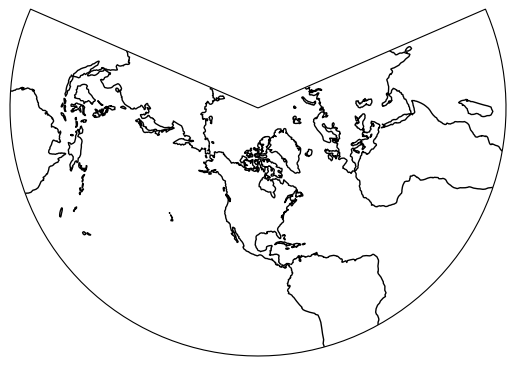

In [23]:
fig = plt.figure()
ax = fig.add_subplot(projection=ccrs.LambertConformal())

# add Cartopy's built-in coastlines for reference
ax.coastlines()

<p>It's important to know which reference system your data are recorded in so that they can be matched to the correct location on the geographic plot. MetPy provides a function for easily getting that information, provided that the data uses following <a href="https://cfconventions.org/" target="blank">CF conventions</a>, called <code>parse_cf()</code>. Let's try this on the GFS DataSet output from earlier.</p>

In [24]:
import metpy

# execute parse_cf function
gfs_ds = gfs_ds.metpy.parse_cf()

# display the new coordinate
gfs_ds.metpy_crs

<xarray.DataArray 'metpy_crs' ()>
array(<metpy.plots.mapping.CFProjection object at 0x000001E78F41FA48>,
      dtype=object)
Coordinates:
    metpy_crs  object Projection: latitude_longitude

<p>The coordinate reference system in this case uses latitude and longitude. While this is technically not a "projected" coordinate reference system, we can simulate this coordinate reference system as a projection using the Plate Carrée projection. The <a href="https://pro.arcgis.com/en/pro-app/latest/help/mapping/properties/plate-carree.htm" target="blank">Plate Carrée projection</a> is commonly used in global model output, as it displays data in equally spaced latitudes and longitudes and preserves direction.</p>

<p>Now that we have this information, we can use this to plot any 2D variables from the NCEP analysis DataSet. We will need the following:</p>

<ol>
    <li>2D data array</li>
    <li>the x coordinates corresponding to each cell in the 2D array</li>
    <li>the y coordinates corresponding to each cell in the 2D array</li>
    <li>the coordinate reference system of the data</li>
    <li>the desired coordinate reference system for the resulting plot</li>
</ol>

<p>Since we used the <code>parse_cf()</code> method earlier, we can use MetPy shortcuts to find items 1-3. We just found item 4 above, and item 5 can be anything we choose!</p>

In [25]:
# 1. 2D data array
data = gfs_ds['Temperature_isobaric'].metpy.sel(vertical = 1000 * units.hPa).squeeze()

# 2 and 3. x and y coordinates
lon = data.metpy.x
lat = data.metpy.y

# 4. crs of the data
data_crs = ccrs.PlateCarree()

# 5. crs of the plot
plot_crs = ccrs.LambertConformal()

<div class="alert alert-success">
    <b>EXERCISE</b>: 

What does <code>.squeeze()</code> do? Try testing by examining the difference by running that line of code with and without the use of the method. 
</div>

In [26]:
# YOUR CODE HERE

Now we put it all together and plot it on our axes!

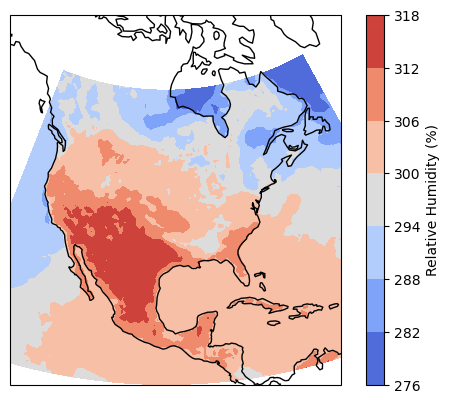

In [27]:
fig = plt.figure()
ax = fig.add_subplot(projection=plot_crs)

# display the data using filled contours, contourf()
cntrf = ax.contourf(lon, lat, data, transform=data_crs, cmap='coolwarm')
cb = fig.colorbar(cntrf, label='Temperature (K)', extend='both')

# set the axes extent in the format [western border, eastern border, southern border, northern border]
ax.set_extent([-121, -68, 10, 70], crs=ccrs.PlateCarree())

# add Cartopy's built-in coastlines for reference
ax.coastlines()

<a name="calc"></a>
## Preview: Calculations 

Earlier this morning your got a preview of how to make calculations using MetPy tools on integer data. Now, we have learned how to access multidimensional data that we've requested from a remote THREDDS Data Server. Let's now combine everything we've done today and get a preview of what's to come tomorrow.

<div class="alert alert-success">
    <b>EXERCISE</b>: Calculating advection of a new variable
    
Tasks:   
<ol>
    <li>Request data
        <ul>
            <li>Using the NetCDF Subset Service, build a query and request your data from a THREDDS Data Server.</li>
            <li>For this exercise, the data you use should be the <b>Best GFS Half Degree Forecast Time Series</b>, as was requested above.</li>
            <li>You <b>must</b> request the u and v components of wind and at least one other variable that makes reasonable sense to be advected (temperature? specific humidity? check the available variables!).</li>
            <li>We recommend requesting variables on <b>isobaric surfaces</b> and within a spatial extent of a single continent to reduce the amount of data required.</li>
            <li>Use the xarray <code>NetCDF4DataStore</code> backends to open your netCDF file as an xarray DataSet</li>
        </ul>
    </li>
    <li>Prepare data
        <ul>
            <li>Choose a single vertical level to calculate horizontal advection. </li>
            <li>Ensure the dimensionality of all variables is <b>2</b>, latitude and longitude only.</li>
            <li>At the end of this stage, you should have three 2-dimensional DataArrays the u-component of wind, the v-component of wind, and a third advected variable.</li>
        </ul>
    </li>    
    <li>Calculate advection
        <ul>
            <li><code>import metpy.calc as mpcalc</code></li>
            <li>Use the example provided in the <a href="https://unidata.github.io/MetPy/latest/examples/calculations/Advection.html#sphx-glr-examples-calculations-advection-py" target="blank">Advection reference guide</a> to calculate advection using the <code>advection()</code> function. </li>
            <li>Optionally: plot your result using any plotting tool of your choice</li>
        </ul>
    </li>
</ol>

In [31]:
## SOLUTION

# Create TDS Catalog object
url = 'https://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p5deg/catalog.xml'
cat = TDSCatalog(url)
cat.datasets

# Open communication to NCSS service
ncss = cat.datasets['Best GFS Half Degree Forecast Time Series'].subset()

# populate query parameters
query = ncss.query()
query.add_lonlat()
query.lonlat_box(west=-130, east=-50, south=10, north=60)
query.time(datetime.utcnow())
query.variables('Temperature_isobaric',
                'Geopotential_height_isobaric',
                'u-component_of_wind_isobaric',
                'v-component_of_wind_isobaric')
query.accept('netcdf4')

# submit request
nc = ncss.get_data(query)

# open in xarray
gfs_ds = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))

# 1. 2D data arrays
temp = gfs_ds['Temperature_isobaric'].metpy.sel(vertical = 500 * units.hPa).squeeze()
u = gfs_ds['u-component_of_wind_isobaric'].metpy.sel(vertical = 500 * units.hPa).squeeze()
v = gfs_ds['v-component_of_wind_isobaric'].metpy.sel(vertical = 500 * units.hPa).squeeze()

# 2 and 3. x and y coordinates
lon = data.metpy.x
lat = data.metpy.y

# 4. crs of the data
data_crs = ccrs.PlateCarree()

# 5. crs of the plot
plot_crs = ccrs.LambertConformal()

# Calculate advection
import metpy.calc as mpcalc
tadv = mpcalc.advection(temp, u, v)
tadv

C:\Users\ncorbin\anaconda3\envs\metpy-workshop\lib\site-packages\metpy\xarray.py:1469: UserWarning: Vertical dimension number not found. Defaulting to (..., Z, Y, X) order.
  'Vertical dimension number not found. Defaulting to (..., Z, Y, X) order.'


Magnitude,[[-0.00011148685814164292 -0.000138314978611898 -7.626559488619649e-05 ... -2.766792819152297e-05 -1.0614536788341758e-05 -1.3357880655732865e-05] [-4.1064824175412696e-05 -4.2600934573320444e-05 -2.084401278107247e-05 ... -2.7446131667955647e-05 -1.4276121546886857e-05 -1.264618194804503e-05] [1.6444030254742014e-06 1.313520476464453e-05 -2.3073928193945225e-05 ... -2.016503933470307e-05 -1.1760199354588685e-05 -2.0145482753320843e-05] ... [-3.999747020680872e-06 1.548511085718822e-05 3.364626556269542e-05 ... -4.999115824921504e-06 2.7803461557606247e-07 -8.591614729517345e-06] [-4.7881506487001454e-06 -1.725783983322423e-05 1.1212236325922289e-05 ... -1.5249750068706075e-06 6.481027701614946e-06 3.1949584388102175e-05] [-6.236719582691096e-05 -6.164929910522117e-05 -1.632973624303193e-05 ... 9.805076345589227e-06 1.375999178944792e-05 1.890232977512696e-05]]
Units,kelvin/second


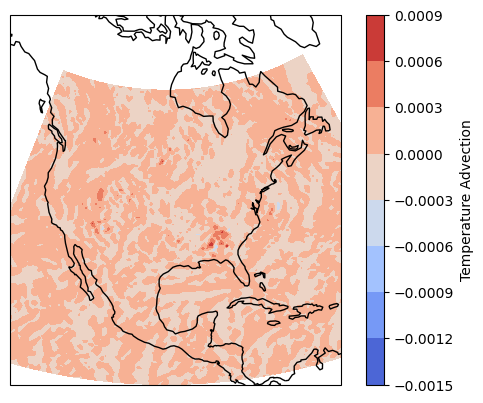

In [32]:
## SOLUTION

fig = plt.figure()
ax = fig.add_subplot(projection=plot_crs)

# display the data using filled contours, contourf()
cntrf = ax.contourf(lon, lat, tadv, transform=data_crs, cmap='coolwarm')
cb = fig.colorbar(cntrf, label='Temperature Advection at 500 hPa', extend='both')

# set the axes extent in the format [western border, eastern border, southern border, northern border]
ax.set_extent([-121, -68, 10, 70], crs=ccrs.PlateCarree())

# add Cartopy's built-in coastlines for reference
ax.coastlines()

## More Information

### Further Practice
Project Pythia: Xarray Tutorial: https://foundations.projectpythia.org/core/xarray.html

Project Pythia: Cartopy Tutorial: https://foundations.projectpythia.org/core/cartopy.html

Project Pythia: Datetime Tutorial: https://foundations.projectpythia.org/core/datetime.html

Siphon Examples: https://unidata.github.io/siphon/latest/examples/index.html

THREDDS Data Server User Guide: https://docs.unidata.ucar.edu/tds/current/userguide/index.html

### Save Your Work
<p>To save any of the files you modified or edited in this session:
    <ol>
        <li>Right click on any item in the left-side navigation pane</li>
        <li>Select <b>Download</b></li>
    </ol>
</p>

<p>
    To recreate the Conda environment used for this session on your local computer:
<ol>
	<li>
		Open a terminal (Linux or MacOS) or Anaconda Prompt (Windows). <br>
		Windows users: If Anaconda Prompt does not exist on your computer, Conda is not installed. Proceed with step 2.2.
	</li>
	<li>
		Confirm that Conda is installed by executing: <br>
		<b>conda --version</b>
		<ol>
			<li>
				If Conda is installed, a version number will be returned. Proceed to step 3.
			</li>
			<li>
				If Conda is not installed, proceed with the installation instructions provided for your operating system at <a href="https://unidata.github.io/python-training/#installing-conda" target="blank">this link</a>, then proceed to step 3.
			</li>
		</ol>
	</li>
	<li>
		Download the conda environment used in this workshop. On the link below, Shift + Right Click &gt; Save link as &gt; save the file as environment.yml in a location of your choosing.<br>
		<a href="https://raw.githubusercontent.com/Unidata/metpy-analysis/main/environment.yml">https://raw.githubusercontent.com/Unidata/metpy-analysis/main/environment.yml</a>
	</li>
	<li>
		In your terminal or command prompt, change directories to the location where the environment.yml file was saved. 
	</li>
	<li>
		Set up the course Python environment with the following command. <br>
		Note: this will take a few minutes to complete. <br>
		<b>conda env create -f environment.yml</b>
	</li>
	<li>
		Verify that the environment installed correctly by looking for <b>metpy-analysis</b> in your conda environment list <br>
		<b>conda env list</b>
	</li>
	<li>
		To use the new environment, activate the new environment<br>
		<b>conda activate metpy-analysis</b>
	</li>
	<li>
		Launch Jupyter Lab<br>
		<b>jupyter lab</b>
	</li>
</ol>
  
### Connect with Unidata
https://twitter.com/unidata

https://twitter.com/metpy

https://youtube.com/unidatanews

https://www.linkedin.com/company/unidatanews